## Data Preparation

### Load Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("D:\\UB\\Dicoding\\Datasets\\archive\\AirQuality.csv", delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


### Cleaning Data

In [63]:
# 1. Menghapus kolom yang tidak berguna
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

df['Time'].fillna('00:00:00', inplace=True)

# Konversi kolom Date terlebih dahulu
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Format ulang Time agar sesuai
df['Time'] = df['Time'].str.replace('.', ':')  # Ganti titik dengan titik dua
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time  # Pastikan hanya waktu

# Gabungkan menjadi datetime dengan format yang jelas
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

# 3. Mengonversi kolom numerik dan menangani nilai yang salah
# Mengganti koma dengan titik pada kolom yang perlu
columns_to_replace_commas = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in columns_to_replace_commas:
    df[col] = df[col].str.replace(',', '.').astype(float)  # Ganti ',' dengan '.' dan konversi ke float

# Memastikan kolom CO(GT) sepenuhnya menjadi float dan tidak ada kesalahan
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')  # Konversi dan ganti yang tidak bisa konversi menjadi NaN

# 4. Menangani nilai yang hilang dengan penghapusan atau imputasi
# Untuk contoh ini, kita akan menghapus baris yang memiliki nilai NaN
df.dropna(inplace=True)

# 5. Memeriksa duplikasi
df.drop_duplicates(inplace=True)

df.drop(columns=['Date', 'Time'], inplace=True)

# (Opsional) Menyimpan DataFrame yang sudah dibersihkan ke file baru
df.to_csv('AirQuality_Cleaned.csv', index=False, sep=';')

C:\Users\akmal\AppData\Local\Temp\ipykernel_14484\1310573881.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].fillna('00:00:00', inplace=True)


In [64]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   NMHC(GT)       9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  Datetime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


1. **Menghapus Kolom yang Tidak Berguna**:
   - Kolom yang bernama 'Unnamed: 15' dan 'Unnamed: 16' dihapus karena tidak menyimpan informasi yang berguna.

2. **Mengisi Nilai yang Hilang**:
   - Kolom 'Time' diisi dengan nilai default '00:00:00' untuk menangani nilai yang hilang.

3. **Konversi Format Tanggal dan Waktu**:
   - Kolom 'Date' dikonversi menjadi tipe datetime untuk memudahkan manipulasi.
   - Format waktu pada kolom 'Time' diperbaiki dengan mengganti tanda titik dengan titik dua, dan dikonversi ke tipe waktu (time).

4. **Menggabungkan Tanggal dan Waktu**:
   - Ditambahkan kolom 'Datetime' yang menggabungkan informasi tanggal dan waktu menjadi satu kolom datetime yang lebih mudah dianalisis.

5. **Mengonversi Kolom Numerik**:
   - Kolom numerik seperti 'CO(GT)', 'C6H6(GT)', 'T', 'RH', dan 'AH' ditangani dengan mengganti tanda koma dengan titik serta mengkonversinya menjadi tipe float. Ini penting untuk memastikan bahwa data numerik dapat digunakan dalam analisis.

6. **Menangani Nilai yang Hilang**:
   - Baris dengan nilai NaN dihapus dari dataset untuk memastikan integritas data.

7. **Memeriksa Duplikasi**:
   - Duplikasi dalam dataset dihapus untuk mencegah bias dalam model yang akan dilatih.

8. **Menyimpan Data yang Sudah Dibersihkan**:
   - DataFrame yang telah dibersihkan disimpan dalam file baru bernama 'AirQuality_Cleaned.csv' untuk analisis lebih lanjut.

## Data Preparation

In [68]:
# Menampilkan informasi DataFrame awal
print("DataFrame sebelum normalisasi:")
print(df.describe())

# 1. Normalisasi Menggunakan Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Menginisialisasi scaler
scaler = MinMaxScaler()

# Kolom yang akan dinormalisasi
columns_to_normalize = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
    'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
]

# Melakukan normalisasi
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Menampilkan informasi DataFrame setelah normalisasi
print("\nDataFrame setelah normalisasi:")
print(df.describe())

# (Opsional) Menyimpan DataFrame yang dinormalisasi ke file baru
df.to_csv('AirQuality_Normalized.csv', index=False, sep=';')

DataFrame sebelum normalisasi:
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      0.782409     0.557585     0.029453     0.765513       0.453436   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.946673     0.500446     0.000000     0.773606       0.377382   
50%       0.950920     0.559375     0.000000     0.788396       0.453604   
75%       0.956111     0.634375     0.000000     0.810011       0.540597   
max       1.000000     1.000000     1.000000     1.000000       1.000000   
std       0.366480     0.147247     0.100640     0.156922       0.141812   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean      0.219546      0.345123     0.478053      0.534951     0.431536   
min       0.000000      0.000000     0.000000      0.000

1. **Menampilkan Informasi DataFrame Awal**:
   - Menggunakan metode `describe()` untuk memeriksa statistik dasar dari dataset sebelum dilakukan normalisasi. Ini memberikan gambaran tentang distribusi data untuk setiap kolom.

2. **Normalisasi Menggunakan Min-Max Scaling**:
   - Mengimpor `MinMaxScaler` dari pustaka `sklearn.preprocessing` yang digunakan untuk melakukan normalisasi.
   - Menginisialisasi scaler yang akan digunakan untuk mengubah skala data.
   - Mendefinisikan kolom-kolom yang akan dinormalisasi, yang mencakup kolom-kolom yang relevan dengan kualitas udara.

3. **Melakukan Normalisasi**:
   - Menggunakan scaler untuk menerapkan Min-Max Scaling pada kolom yang telah ditentukan, sehingga nilai dari setiap kolom berada dalam rentang [0, 1].

4. **Menampilkan Informasi DataFrame Setelah Normalisasi**:
   - Menggunakan `describe()` lagi untuk memeriksa statistik dasar dari dataset setelah normalisasi. Ini memungkinkan kita untuk melihat perubahan yang terjadi pada distribusi data setiap kolom.

5. **Menyimpan Data yang Dinormalisasi**:
   - (Opsional) Menyimpan DataFrame yang telah dinormalisasi ke dalam file baru bernama 'AirQuality_Normalized.csv' untuk digunakan dalam analisis atau pelatihan model di masa mendatang.

### Visualisasi Data

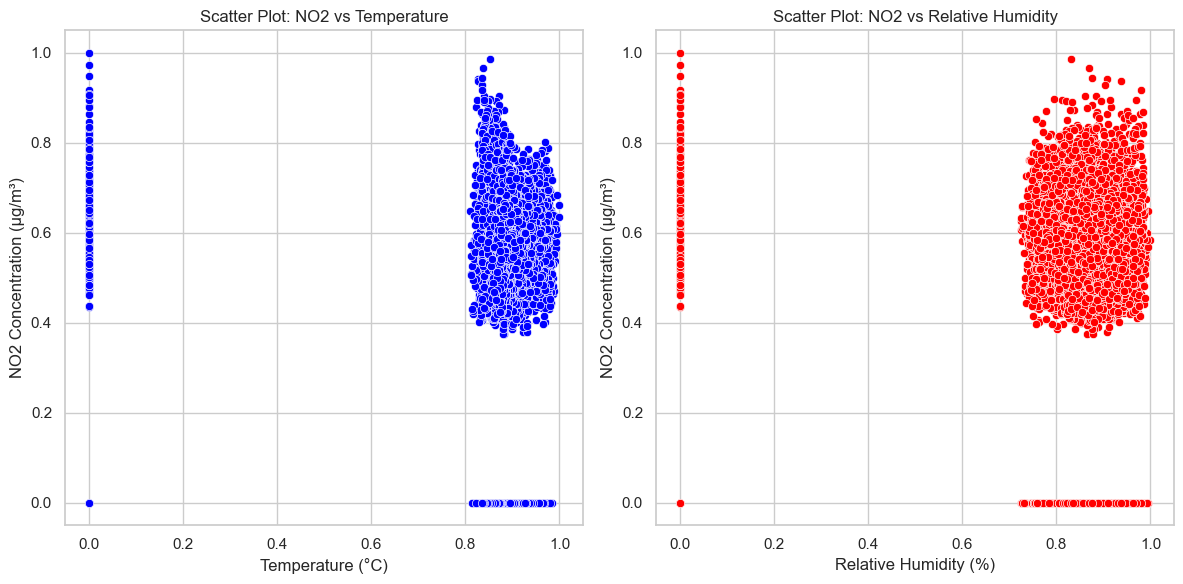

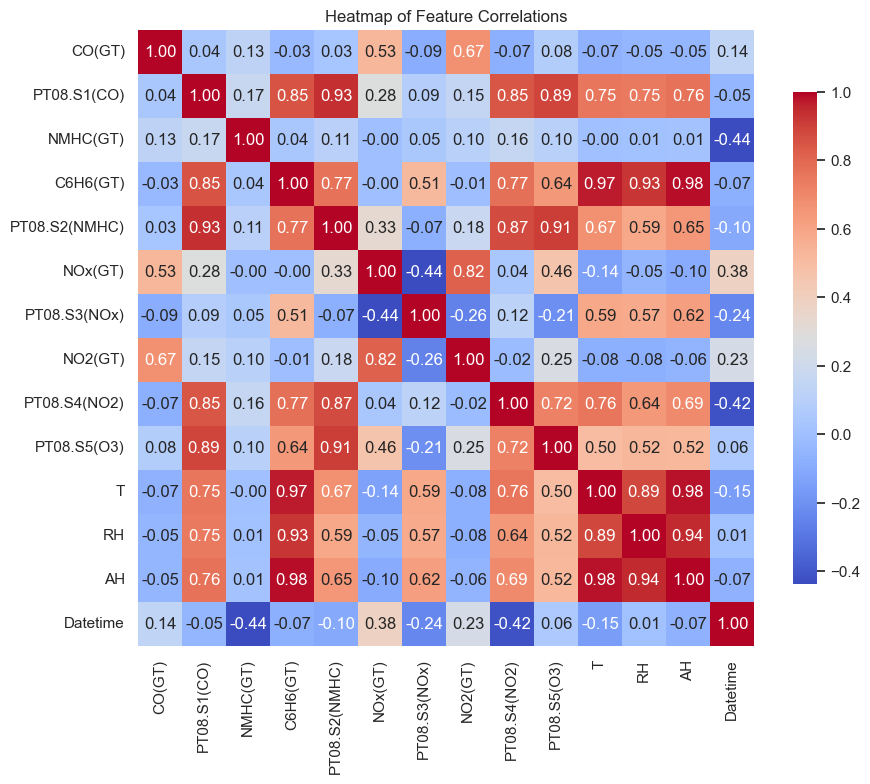

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya seaborn untuk visualisasi
sns.set(style='whitegrid')

# 1. Visualisasi scatter plot untuk memprediksi konsentrasi polutan
# Kita pilih contoh polutan NO2(GT) dan fitur suhu (T)
plt.figure(figsize=(12, 6))

# Scatter plot NO2(GT) vs Temperature (T)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='T', y='NO2(GT)', color='blue')
plt.title('Scatter Plot: NO2 vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('NO2 Concentration (µg/m³)')

# Scatter plot NO2(GT) vs Relative Humidity (RH)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='RH', y='NO2(GT)', color='red')
plt.title('Scatter Plot: NO2 vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('NO2 Concentration (µg/m³)')

plt.tight_layout()
plt.show()

# 2. Analisis Fitur: Heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Feature Correlations')
plt.show()

1. **Visualisasi Scatter Plot**:
   - Memvisualisasikan hubungan antara konsentrasi NO2 dan dua variabel: 
     - **Suhu (T)**: Menampilkan scatter plot dengan NO2 di sumbu Y dan suhu di sumbu X untuk melihat bagaimana suhu mempengaruhi konsentrasi NO2.
     - **Kelembapan Relatif (RH)**: Menampilkan scatter plot kedua dengan NO2 di sumbu Y dan kelembapan relatif di sumbu X untuk mengeksplorasi hubungan antara kelembapan dan konsentrasi polutan.

2. **Analisis Fitur dengan Heatmap**:
   - Menghitung matriks korelasi untuk semua fitur dalam dataset.
   - Membuat heatmap untuk memvisualisasikan tingkat korelasi antar fitur dengan memberikan anotasi pada setiap sel, sehingga memudahkan dalam melihat hubungan positif dan negatif di antara variabel.
   - Menggunakan palet warna 'coolwarm' untuk menekankan perbedaan tingkat korelasi, di mana nilai mendekati 1 atau -1 menunjukkan korelasi yang kuat, sedangkan nilai mendekati 0 menunjukkan tidak adanya korelasi.

## Modelling

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Memisahkan fitur dan target
X = df.drop(columns=['CO(GT)', 'Datetime'])  # Fitur (semua kolom kecuali target dan timestamp)
y = df['CO(GT)']  # Target (konsentrasi CO)

# 2. Membagi dataset menjadi train dan test dengan proporsi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Melatih model Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 4. Melatih model Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Melakukan prediksi menggunakan kedua model
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5  # Hitung RMSE secara manual
    r2 = r2_score(y_true, y_pred)
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

# Evaluasi untuk Linear Regression
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Evaluasi untuk Random Forest Regression
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Evaluation Metrics for Linear Regression:
Mean Absolute Error: 0.1580
Root Mean Squared Error: 0.2525
R² Score: 0.5153

Evaluation Metrics for Random Forest Regression:
Mean Absolute Error: 0.1052
Root Mean Squared Error: 0.2154
R² Score: 0.6475



In [72]:
from sklearn.model_selection import GridSearchCV

# Menginisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Menentukan parameter grid untuk dicari
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Menggunakan GridSearchCV untuk menemukan hyperparameters terbaik
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)

# Memprediksi menggunakan model terbaik
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluasi model terbaik
evaluate_model(y_test, y_pred_best_rf, "Optimized Random Forest Regression")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Evaluation Metrics for Optimized Random Forest Regression:
Mean Absolute Error: 0.1056
Root Mean Squared Error: 0.2147
R² Score: 0.6497



In [ ]:
# Contoh profil input untuk prediksi
# Format: [ PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH ]
input_profiles = [
    [0.5, 0.02, 0.75, 0.45, 0.2, 0.35, 0.5, 0.54, 0.45, 0.85, 0.8, 0.95],  # Profil 1
    [0.7, 0.03, 0.78, 0.5, 0.25, 0.4, 0.55, 0.6, 0.5, 0.75, 0.82, 0.93],  # Profil 2
    [0.6, 0.04, 0.80, 0.48, 0.3, 0.42, 0.57, 0.55, 0.49, 0.78, 0.79, 0.91],  # Profil 3
    [0.55, 0.01, 0.70, 0.46, 0.15, 0.38, 0.52, 0.53, 0.52, 0.88, 0.76, 0.97],  # Profil 4
    [0.8, 0.07, 0.85, 0.52, 0.4, 0.48, 0.6, 0.62, 0.55, 0.72, 0.77, 0.89],  # Profil 5
    [0.9, 0.05, 0.88, 0.55, 0.35, 0.45, 0.65, 0.65, 0.57, 0.89, 0.74, 0.8],  # Profil 6
    [0.4, 0.02, 0.60, 0.44, 0.1, 0.33, 0.45, 0.44, 0.4, 0.7, 0.6, 0.92],  # Profil 7
    [0.75, 0.04, 0.76, 0.5, 0.3, 0.4, 0.53, 0.55, 0.51, 0.76, 0.78, 0.94],  # Profil 8
    [0.65, 0.05, 0.79, 0.49, 0.2, 0.39, 0.58, 0.58, 0.54, 0.83, 0.75, 0.91],  # Profil 9
    [0.85, 0.03, 0.82, 0.53, 0.45, 0.47, 0.62, 0.6, 0.56, 0.82, 0.79, 0.88]   # Profil 10
]

# Mengonversi input ke DataFrame untuk prediksi
input_df = pd.DataFrame(input_profiles, columns=[
    'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
    'PT08.S5(O3)', 'T', 'RH', 'AH'
])

# Melakukan prediksi menggunakan model yang dilatih
predictions = rf_model.predict(input_df)

# Menampilkan hasil prediksi
for i, prediction in enumerate(predictions):
    print(f"Prediksi untuk Profil {i + 1}: {prediction:.4f}")

Prediksi untuk Profil 1: 0.7939
Prediksi untuk Profil 2: 0.8407
Prediksi untuk Profil 3: 0.9190
Prediksi untuk Profil 4: 0.7082
Prediksi untuk Profil 5: 0.9541
Prediksi untuk Profil 6: 0.9612
Prediksi untuk Profil 7: 0.3918
Prediksi untuk Profil 8: 0.8932
Prediksi untuk Profil 9: 0.8184
Prediksi untuk Profil 10: 0.9539


1. **Memisahkan Fitur dan Target**:
   - Menetapkan fitur (X) dengan menghapus kolom 'CO(GT)' dan 'Datetime', dan menetapkan target (y) sebagai konsentrasi CO.

2. **Membagi Dataset**:
   - Membagi dataset menjadi training set dan testing set dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.

3. **Melatih Model**:
   - Menggunakan Linear Regression dan Random Forest Regression untuk melatih model berdasarkan data pelatihan.

4. **Melakukan Prediksi**:
   - Menggunakan kedua model untuk memprediksi nilai CO pada dataset testing.

5. **Evaluasi Model**:
   - Menggunakan metrik evaluasi, termasuk Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R² Score, untuk mengevaluasi kinerja kedua model.
   - Hasil evaluasi menunjukkan bahwa model Random Forest memiliki performa yang lebih baik dibandingkan Linear Regression.

6. **Optimasi Model dengan GridSearchCV**:
   - Mencari hyperparameter terbaik untuk Random Forest menggunakan GridSearchCV, dengan menentukan grid parameter untuk dicari.
   - Menampilkan parameter terbaik setelah pencarian grid.

7. **Prediksi Menggunakan Model Terbaik**:
   - Melakukan prediksi menggunakan model Random Forest terbaik dan menampilkan hasil prediksi untuk beberapa profil input yang telah ditentukan.

8. **Hasil Prediksi**:
   - Menghadirkan prediksi konsentrasi CO untuk 10 profil berbeda berdasarkan input yang telah disiapkan.